# Part II - Analysis of Effects of Loan Characteristics on Loan Amounts
## by Geoffrey Mosongo


## Investigation Overview

In this anlaysis, various characteristics of loans that could be used to predict their borrower APR are examined. Characteristics of interest include; the original loan amount, the borrower's Prosper rating, loan term, borrower's stated monthly income and house ownership.


## Dataset Overview

There are 113,937 loans in the dataset with 81 characteristics. Most variables are numeric and categorical in nature. The characteristics included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('ProsperLoanData.csv')
df = df_loan[[  'LoanKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term', 
                'LoanOriginalAmount', 'MonthlyLoanPayment','ListingCategory (numeric)',  'BorrowerAPR', 
                'BorrowerRate','CreditGrade', 'ProsperRating (Alpha)', 'CreditScoreRangeLower', 
                'CreditScoreRangeUpper', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 
                'DebtToIncomeRatio', 'EmploymentStatus','IsBorrowerHomeowner']]

#Change data types in the date columns
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

#adjust data type for categorical columns
df = df.astype({"LoanStatus":"category","ListingCategory (numeric)":"category","EmploymentStatus":"category"})

# Create ordered categorical values for columns CreditGrade, ProsperRating (Alpha) and IncomeRange
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)
    

## Loan Origination Year

When Prosper started business in 2005 a few loans were issued. According to Wikipedia, they stopped their business between Nov 2008 - July 2009 explaining why the number of loans given out decreased during this period.

The number of new loans increased from 2010 with 2013 recoring the highest number. 

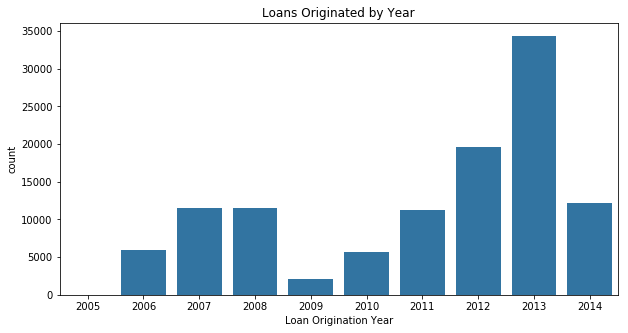

In [3]:
# Loan Origination by Year
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=df,x=df['LoanOriginationDate'].dt.year, color= base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

##  Enumerating Numerical Data 

* The correlation coefficient of borrower APR and loan original amount is -0.323, implying that the more the loan amount, the lower the APR.

* The loan original amount is positively correlated with the stated monthly income, indicating that borrowers who earn more per month contend with more loan amounts.

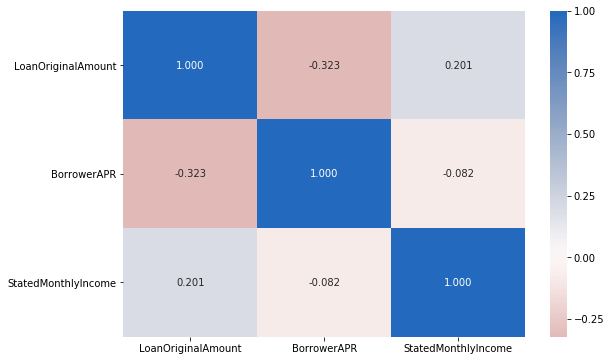

In [4]:
#Define numerical and categorical vriables
numerical_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
categorical_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']
bool_vars = ['LoanStatus', 'IncomeVerifiable', 'IsBorrowerHomeowner']

# correlation plot
plt.figure(figsize = [9, 6])
sb.heatmap(df[numerical_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

## Does APR and Loan Original Amount Determine Interest Rates?

* Higher loan amounts attract lower interst rates but with higher monthly installments



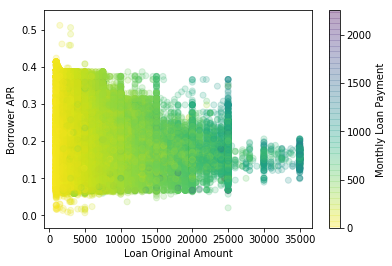

In [5]:
#scatter plot for Borrower APR and Loan Original Amount
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/5, c = 'MonthlyLoanPayment', 
            cmap = 'viridis_r')
plt.colorbar(label = 'Monthly Loan Payment')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [6]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt


/bin/sh: 1: cannot open Part_II_Filename: No such file


In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 397158 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
